In [1]:
import sys
sys.path.append('/usr/src/gym4real')  # <-- path to the *parent* of gym4real
import os
import gymnasium as gym
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt

import gym4real.envs.robofeeder as rf
from gym4real.algorithms.robofeeder import baseline

In [33]:
def plot_action(current_obs,action):
    # evaluate picking point respect to the observation
    print("evaluate picking point respect to the observation")
    plt.imshow(current_obs[0],cmap=plt.cm.gray)

    #rescale the action to the image size, with aciion being in [-1,1]
    action[0] = (action[0] + 1) * 0.5 * current_obs[0].shape[1]
    action[1] = (action[1] + 1) * 0.5 * current_obs[0].shape[0]
    # add x-y coordinates of the action
    plt.scatter(action[0],action[1],marker='o',color='red',s=100)
    plt.show()


In [2]:
current_dir = os.path.dirname(rf.__file__)
# Load the object detection network
pretrained_ppo_dir = os.path.join(current_dir, "utils", "Pretrained/")

# Init the ONNX runtime session
providers = ['CUDAExecutionProvider','CPUExecutionProvider']
pretrained_agent = ort.InferenceSession(pretrained_ppo_dir + 'PPO_Stoc.onnx',providers=providers)
# baseline_agent = baseline.Baseline_picking()

/usr/local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [3]:
env = gym.make('gym4real/robofeeder-picking-v0', config_file=(current_dir + '/configuration.yaml'))

/usr/local/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment gym4real/robofeeder-picking-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [35]:
# perform an action with pretrained agent   
current_obs,_ = env.reset()
action = pretrained_agent.run(None, {"input": np.expand_dims(current_obs,axis=0)})[0][0]
print("pretrained agent action")
print("normalized X:",action[0]," normalized Y:",action[1]," Theta [rad]:",action[2])
obs,rew,done,_,_ = env.step(action)

print("done:",done) 
print("reward:",rew,"\n")

if(done): env.reset()

pretrained agent action
normalized X: -0.37315038  normalized Y: 0.6462805  Theta [rad]: 0.25387716
done: True
reward: 1 



evaluate picking point respect to the observation


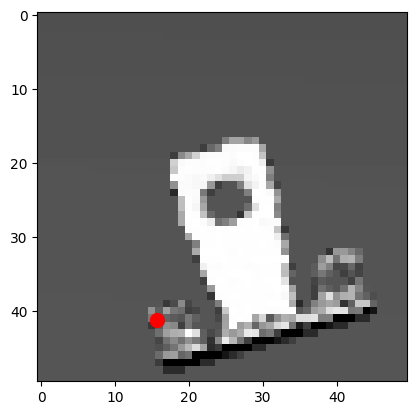

In [36]:
plot_action(current_obs,action)

In [41]:
baseline_agent = baseline.Baseline_picking(env.action_space)

In [42]:
# perform an action with baseline agent   

current_obs,_ = env.reset()
action = baseline_agent.act()
print("pretrained agent action")
print("normalized X:",action[0]," normalized Y:",action[1]," Theta [rad]:",action[2])
action = np.array(action)
obs,rew,done,_,_ = env.step(action)

print("done:",done) 
print("reward:",rew,"\n")

if(done): env.reset()


pretrained agent action
normalized X: 0.0  normalized Y: 0.0  Theta [rad]: 0.0
done: False
reward: -1 



evaluate picking point respect to the observation


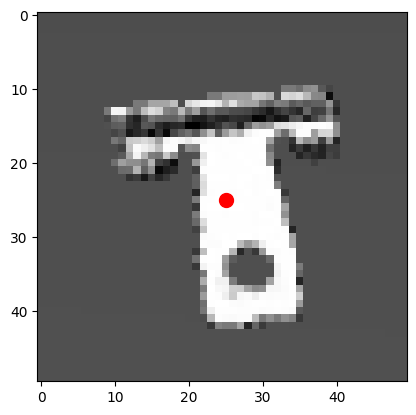

In [43]:
plot_action(current_obs,action)